# Figure 5

## Imports

In [1]:
from brian2 import *
prefs.codegen.target = 'numpy'

import itertools
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import glob

from encoder_class.phase_encoder import PhaseEncoder, run_simulation
from encoder_class.theoretical_functions import phi_of_I_lin, phi_of_I, mixture, zero_order_H, gauss_H, approx_mutual_I, bins_mutual_I
from encoder_class.plot_functions import plt_fig_5b, plt_fig_5c

## Network Setup

In [2]:
# a network identical to that in grid_freqDV_cluster.py is initialized

M = 10
N = 1

model_params = {}
model_params["tau_m"] = 24*ms
model_params["R_m"] = 142e6*ohm
model_params["v_thres"] = 15*mV
model_params["v_rest"] = 0*mV
model_params["v_reset"] = 0*mV
model_params["tau_ref"] = 0*ms
model_params["v_0"] = 0*mV
model_params["noise_frac"] = 0.16

oscillation_params = {}
oscillation_params["I_osc"] = 40*pA
oscillation_params["f"] = 4*Hz

input_params = {}
input_params["automatic_range"] = True
input_params["corr_frac"] = 0.05
input_params["I_min"] = 75*pA
input_params["I_max"] = 130*pA

simulation_params = {}
simulation_params["method"] = "euler"
simulation_params["num_oscillations"] = 400
simulation_params["monitor_spikes"] = True
simulation_params["monitor_voltage"] = False
simulation_params["dt"] = 0.05*ms
simulation_params["record_dt"] = 0.5*ms

In [3]:
## parameter space is also initialized identically

partition = 100

f_lims = [1*Hz, 50*Hz]

fs = np.linspace(f_lims[0], f_lims[1], partition)
v_thres_DV = np.linspace(20.22, 15.78, partition)*mV
R_m_DV = np.linspace(24.8, 94.4, partition)*1e6*ohm
tau_m_DV = np.linspace(14.45, 33.35, partition)*ms
I_osc_DV = np.linspace(60,30, partition)*pA
DV_gradient = np.arange(partition)

experiments = itertools.product(DV_gradient, fs)
num_experiments = len(list(experiments))

## Load and Process Data

In [4]:
#load data generated with grid_freqDV_cluster.py

partition = 100
exp_MI_matrix = []
files = [file for file in sorted(glob.glob('cluster_sims/Data_Iosc/*.pickle'))]

for filename in files:
    with open(filename, 'rb') as handle:
        result = pickle.load(handle)
        exp_MI_matrix.append( result['MI'] )     
        
exp_MI_matrix = np.clip(np.reshape(exp_MI_matrix, (100,100)), 0, None)
fs_matrix = np.log2(np.exp(1))*np.transpose(np.repeat(fs, partition).reshape(partition, partition))/Hz
exp_bits_second = fs_matrix*exp_MI_matrix

exp_normalized = np.zeros((partition,partition))
for index, row in enumerate(exp_bits_second):
    exp_normalized[index, :] = row/np.max(row)

## Figure 5B

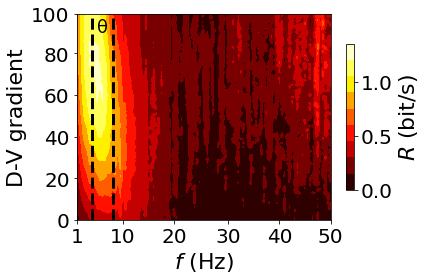

In [5]:
#plt.figure(figsize=(10,8))
#plt.imshow(exp_bits_second, cmap='hot', vmin=0, interpolation='bilinear', origin='lower')
plt.contourf(exp_bits_second, cmap='hot', levels=10, vmin=0)

plt_fig_5b(fs, DV_gradient)

plt.savefig('Figures/Figure_5b.svg', dpi=600)
plt.savefig('Figures/Figure_5b.png', dpi=600)
plt.show()

## Figure 5C

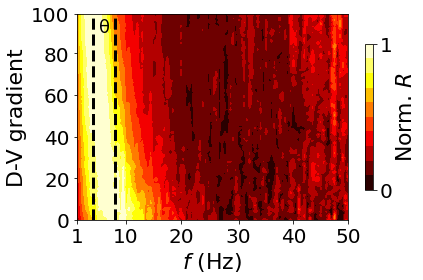

In [6]:
#plt.figure(figsize=(10,8))
plt.contourf(exp_normalized, cmap='hot', levels=10, vmin=0)

plt_fig_5c(fs, DV_gradient)

plt.savefig('Figures/Figure_5c.svg', dpi=600)
plt.savefig('Figures/Figure_5c.png', dpi=600)
plt.show()